# Problem Definition

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics


In [21]:
#import libraries

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
from sklearn import metrics

init_notebook_mode(connected = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV



import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

# Data Analysis   (EDA)

In [23]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [24]:
pd.set_option('max_columns', None)

In [25]:
pd.set_option('max_rows', None)

In [26]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [27]:
df.shape

(30, 17)

In [28]:
# Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, 
# Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

#R – Runs scored: number of times a player crosses home plate
#AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
#H – Hit: reaching base because of a batted, fair ball without error by the defense
#2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
#3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
#HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
#BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
#SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
#

In [29]:
# Output: Number of predicted wins (W)

# W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [31]:
# Total features are 17, out of which 1 is float type and remaining are integer.
# No null values are present in tha dataset
# Total records are 30

In [32]:
df.shape

(30, 17)

In [33]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [34]:
# Target variable is W
df.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [35]:
# this is Regression problem sothat we have to precit the total number of wins by a team
#Analyse Target variable first

<AxesSubplot:xlabel='W', ylabel='Density'>

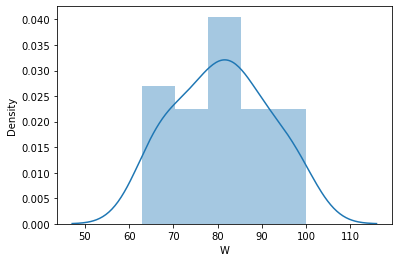

In [36]:
#Analyse Target variable first
sns.distplot(df.W)

In [37]:
# seems normal distribution

<AxesSubplot:xlabel='W', ylabel='Count'>

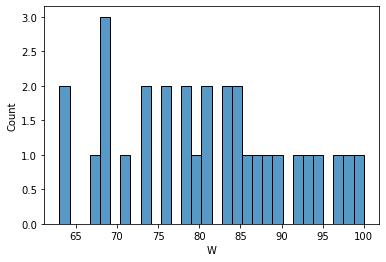

In [38]:
sns.histplot(df.W, bins=30)

In [39]:
# Wins depends on various features, we need to find the relation

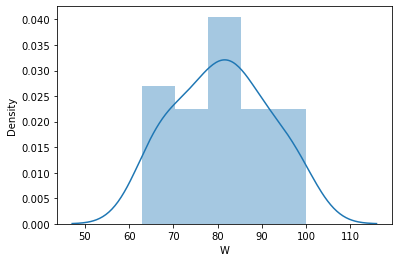

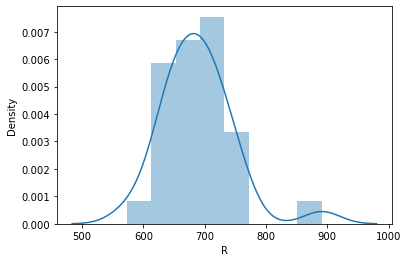

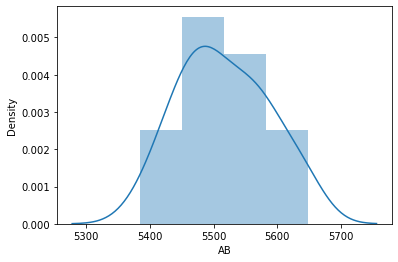

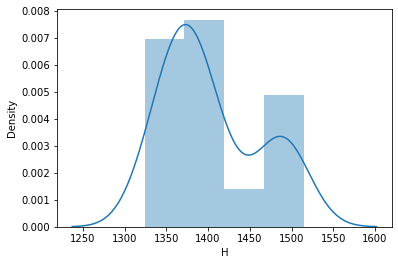

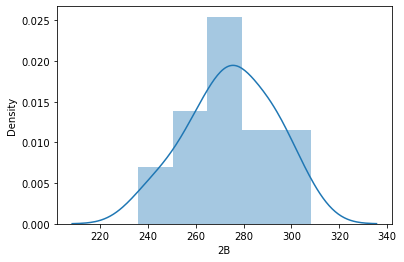

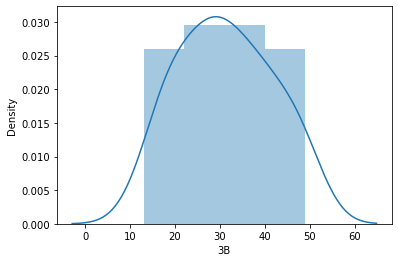

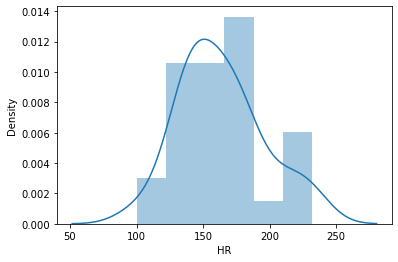

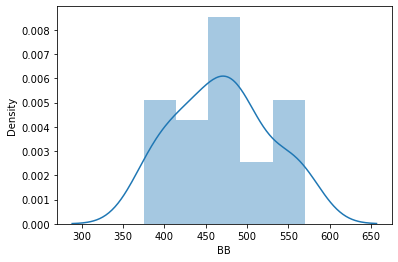

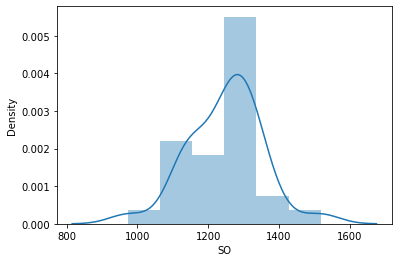

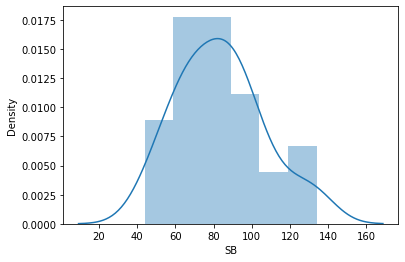

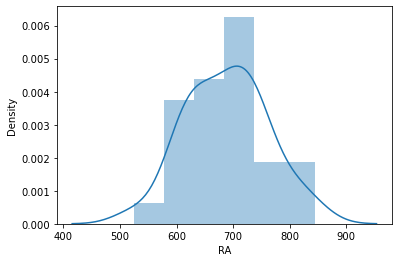

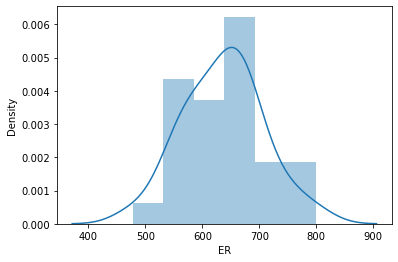

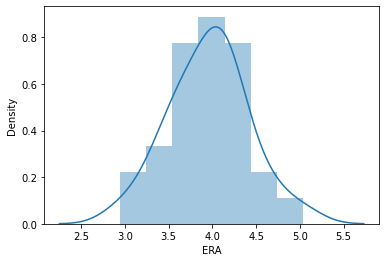

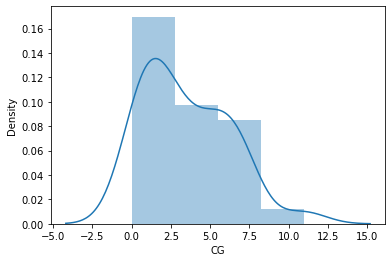

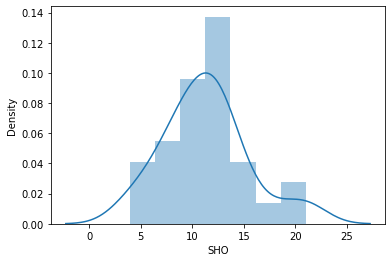

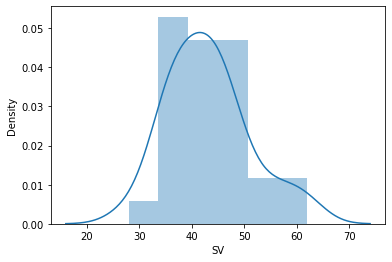

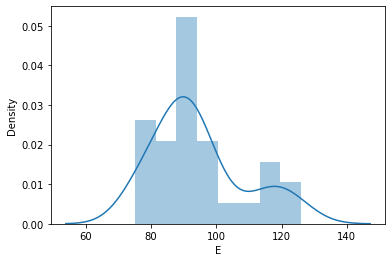

In [40]:
# Distribution of all features

for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [41]:
# R  -  is right skewed data and 2 peaks
# AB  - kinf od normal distribution
# H - Bipolar distributed data
#2B  - lil bit left skewed data
#3B  - kind of normal distribution
# HR - some skewness on both side
#BB  - also have sort of skewness on both side
# SO  - skewed data on both sides
#SB right side skewed
#RA - skewed data
# ER  - lil skewed data
# ERA - Skewed on both side
# CG - not normal distributed data
#  SHO= not noprmal distributed
#SV - right skewed
#E Bipolar data

In [42]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

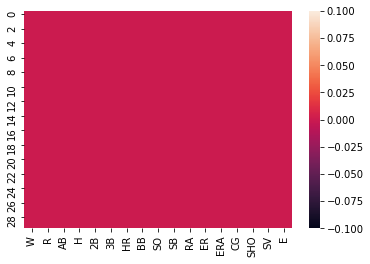

In [43]:
sns.heatmap(df.isnull())

In [44]:
#There are no null values present.

In [45]:
df.corr()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [46]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:>

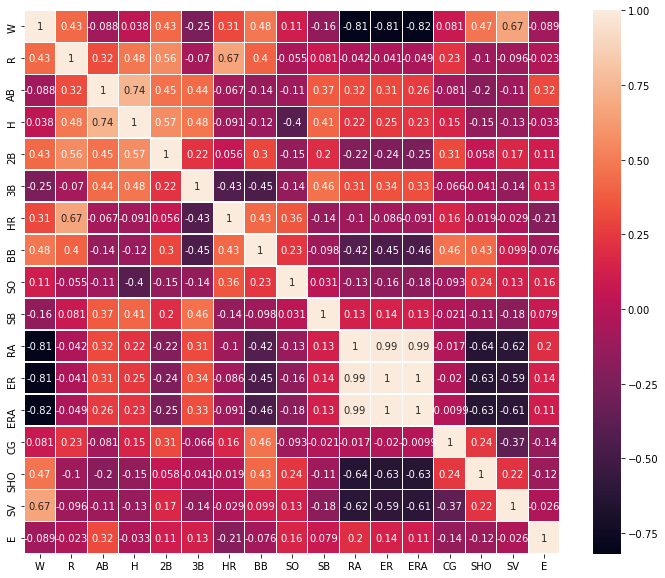

In [47]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

In [48]:
# Correlation analysis, First independent vs dependent

# R,HR,2B,BB,SHO, SV  is good correlated with target variable (W)

# AB, H, 3B, SO,SB,CG,E  are low correlated with target variable (+ and -)

# RA, ER, ERA  are highly negative correlated, we have to further check to drop any of them.
# RA, ER, ERA  are highly correlated to each other. these feature can bios the result. we have to take decicion on them.
# AB and H are strong correlated to each other 74%

# Pre-Processing Pipeline

<AxesSubplot:xlabel='R', ylabel='W'>

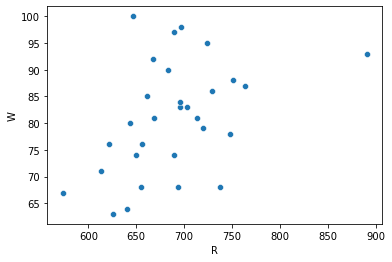

In [49]:
# Runs scored vs Win
sns.scatterplot('R','W',data=df)

In [50]:
# Run scored have positive graph with wins,  more the run, more chances toi WIN

<AxesSubplot:xlabel='AB', ylabel='W'>

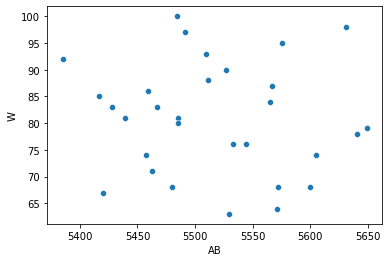

In [51]:
# AB vs Win

sns.scatterplot('AB','W',data=df)

In [52]:
# Data distribution is not in any direction, distributed everywhere, low correlated

<AxesSubplot:xlabel='H', ylabel='W'>

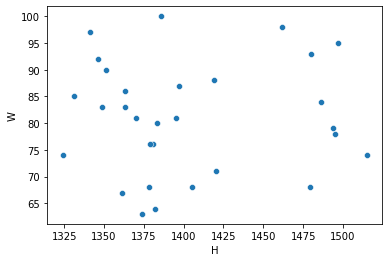

In [53]:
#  H vs win

sns.scatterplot('H','W',data=df)

In [54]:
# data distribution not in any direction, low correlated with Win 
# predict the win.

<AxesSubplot:xlabel='2B', ylabel='W'>

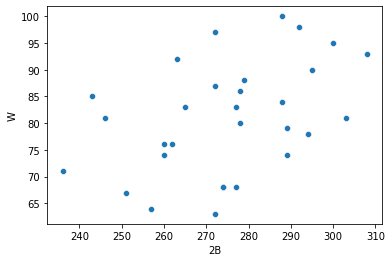

In [55]:
#  2B vs WIN

sns.scatterplot('2B','W',data=df)

In [56]:
# Positive correlated graph.  more 2B, more chances to win

<AxesSubplot:xlabel='3B', ylabel='W'>

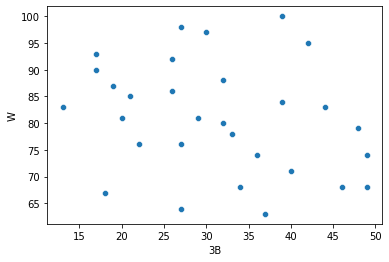

In [57]:
# 3B vs WIN

sns.scatterplot('3B','W',data=df)

In [58]:
# this distribution is low correlated

<AxesSubplot:xlabel='HR', ylabel='W'>

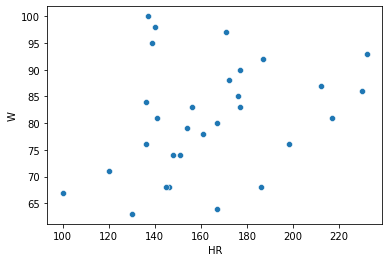

In [59]:
# HR vs WIN

sns.scatterplot('HR','W',data=df)

In [60]:
# Positive correlated

In [61]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:xlabel='BB', ylabel='W'>

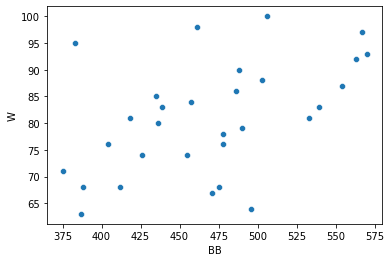

In [62]:
# BB vs win
sns.scatterplot('BB','W',data=df)

In [63]:
# positive correlated  Base on Ball

<AxesSubplot:xlabel='SO', ylabel='W'>

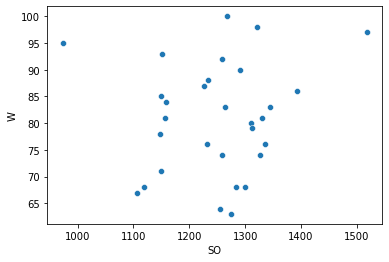

In [64]:
# SO vs WIN

sns.scatterplot('SO','W',data=df)

In [65]:
# low positive correlated

<AxesSubplot:xlabel='SB', ylabel='W'>

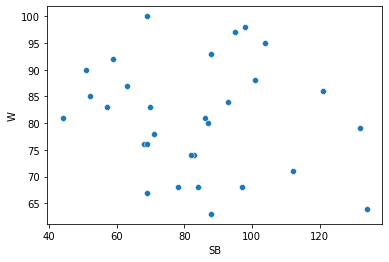

In [66]:
# SB vs win

sns.scatterplot('SB','W',data=df)

In [67]:
#  negative low correlated

<AxesSubplot:xlabel='RA', ylabel='W'>

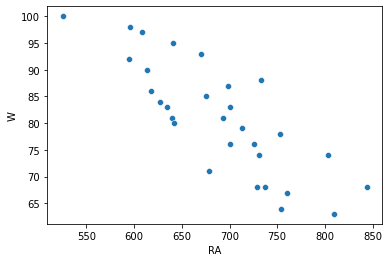

In [68]:
# RA vs win

sns.scatterplot('RA','W',data=df)

In [69]:
# Highly nehative correlated

<AxesSubplot:xlabel='ER', ylabel='W'>

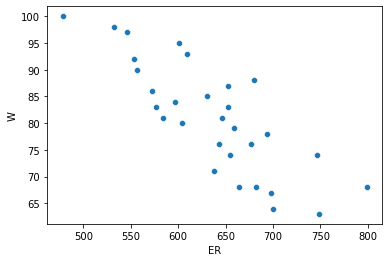

In [70]:
# ER vs Win

sns.scatterplot('ER','W',data=df)

In [71]:
#Highly negative correlated

<AxesSubplot:xlabel='ERA', ylabel='W'>

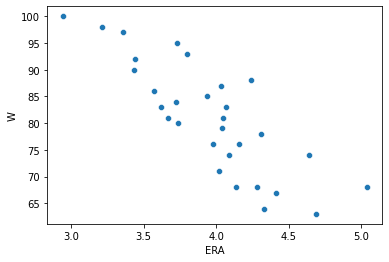

In [72]:
# ERA vs WIN

sns.scatterplot('ERA','W',data=df)

In [73]:
# highly negative correlated

<AxesSubplot:xlabel='CG', ylabel='W'>

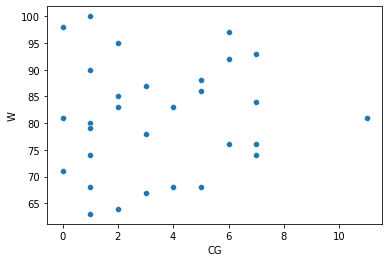

In [74]:
# CG vs WIN

sns.scatterplot('CG','W',data=df)

In [75]:
#  Very low correlated

<AxesSubplot:xlabel='SHO', ylabel='W'>

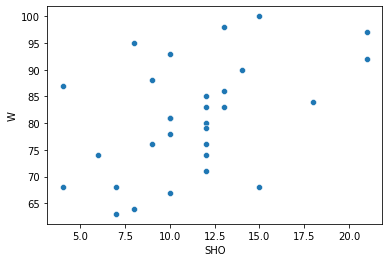

In [76]:
# SHO vs win

sns.scatterplot('SHO','W',data=df)

In [77]:
# positive correlated

<AxesSubplot:xlabel='SV', ylabel='W'>

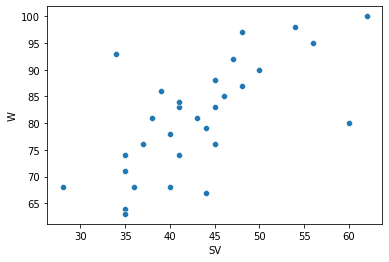

In [78]:
# SV vs win

sns.scatterplot('SV','W',data=df)

In [79]:
# positive correlated

<AxesSubplot:xlabel='E', ylabel='W'>

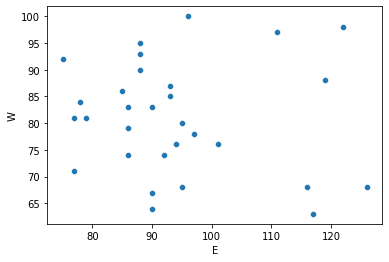

In [80]:
# E vs win

sns.scatterplot('E','W',data=df)

In [81]:
# very low correlated

<AxesSubplot:xlabel='R', ylabel='W'>

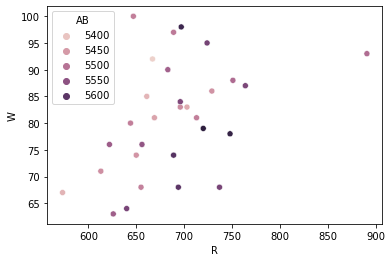

In [82]:
sns.scatterplot('R','W',hue='AB',data=df)  # AB- At bats

Unique values

In [83]:
for i in df.columns:
    df[i].nunique()
    print("unique values of feature ",i, '= ',df[i].nunique())

unique values of feature  W =  24
unique values of feature  R =  28
unique values of feature  AB =  29
unique values of feature  H =  29
unique values of feature  2B =  22
unique values of feature  3B =  23
unique values of feature  HR =  27
unique values of feature  BB =  29
unique values of feature  SO =  29
unique values of feature  SB =  27
unique values of feature  RA =  30
unique values of feature  ER =  30
unique values of feature  ERA =  30
unique values of feature  CG =  9
unique values of feature  SHO =  12
unique values of feature  SV =  20
unique values of feature  E =  21


In [84]:
df.CG.unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

<AxesSubplot:xlabel='R', ylabel='W'>

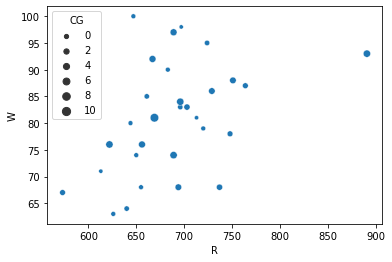

In [85]:
sns.scatterplot('R','W',size='CG',data=df)

<AxesSubplot:xlabel='CG', ylabel='W'>

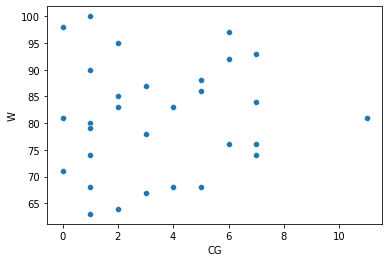

In [86]:
sns.scatterplot('CG','W',data=df)

In [87]:
# Complete Game has no correlation with WIN, There are chances where you played complete game and not won all matches

# A pitcher earns a complete game if he pitches the entire game for his team regardless of how long it lasts. 

<AxesSubplot:xlabel='ER', ylabel='RA'>

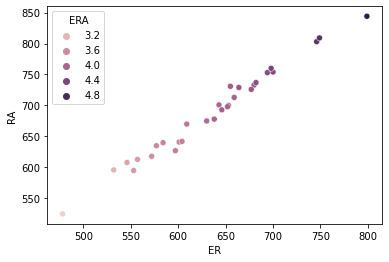

In [88]:
sns.scatterplot('ER', 'RA', hue='ERA',data=df)

In [89]:
#RA - Opponents runs scored
#ER - Earned runs allowed
#ERA - Earned run average

# Earned runs is the key counting statistic used in ERA, the most widely accepted barometer of a pitcher's success. If there are no errors or passed balls in a given inning or game, all the runs in that inning or game are earned runs.

# RA and ER seems the same thing menas, RA - run scored by opponent and ER earned run allowed without any errors>
#Good correlation.

VIF to find multicolinearity

In [90]:
v= df.drop('W', axis=1)
v.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [91]:
sc= StandardScaler()
scaled= sc.fit_transform(v)

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
VIF= pd.DataFrame()
VIF['features']=v.columns

In [94]:
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]

In [95]:
VIF

,features,vif
0,R,11.522370
1,AB,13.311532
2,H,10.070668
3,2B,4.019297
4,3B,3.294146
5,HR,10.079902
6,BB,3.806098
7,SO,2.652401
8,SB,2.102684
9,RA,191.839155


In [96]:
# Many features have more than 5 VIF, 
# Delete feature 'ER'

In [97]:
v= df.drop(['W','ER'], axis=1)

In [98]:
v.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86


In [99]:
scaled=sc.fit_transform(v)

In [100]:
VIF2= pd.DataFrame()
VIF2['features']=v.columns

VIF2['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF2

,features,vif
0,R,11.158733
1,AB,5.863764
2,H,9.628749
3,2B,3.786446
4,3B,3.293109
5,HR,9.057309
6,BB,3.791451
7,SO,2.607389
8,SB,1.849280
9,RA,122.133235


In [101]:
# Delete RA column

v= df.drop(['W','ER','RA'], axis=1)
scaled=sc.fit_transform(v)
VIF3= pd.DataFrame()
VIF3['features']=v.columns

VIF3['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF3

,features,vif
0,R,10.987898
1,AB,4.399954
2,H,8.941874
3,2B,3.729413
4,3B,3.142717
5,HR,7.882841
6,BB,3.468244
7,SO,2.155496
8,SB,1.819823
9,ERA,4.951981


In [102]:
v.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


<AxesSubplot:>

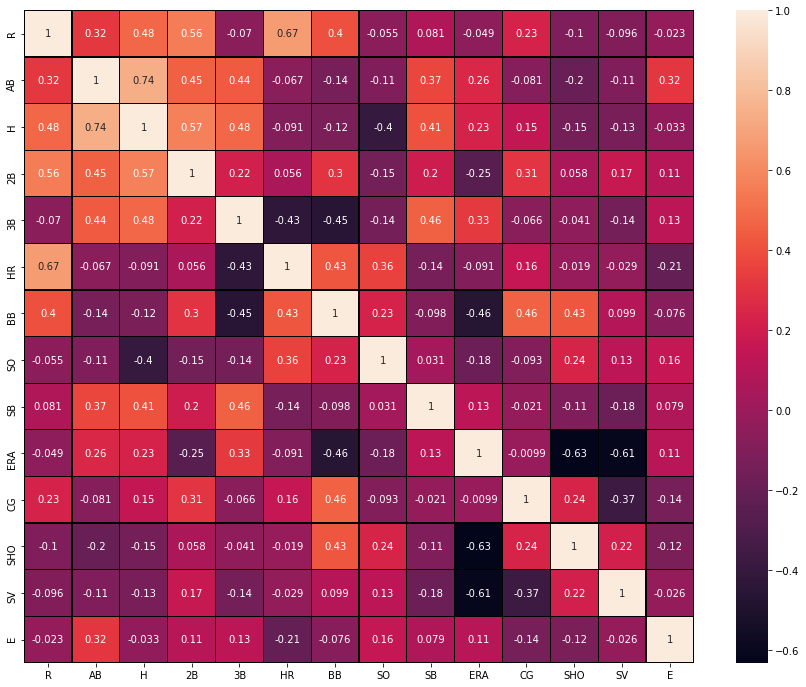

In [103]:
plt.figure(figsize=(15,12))
sns.heatmap(v.corr(), annot=True,linecolor='black', linewidths=.25)

In [104]:
# now all highly correlated features have been removed.

v.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Checking for outliers

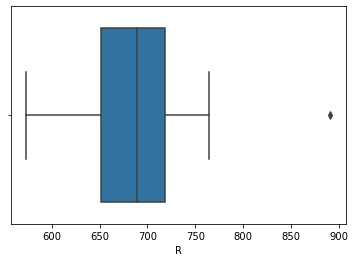

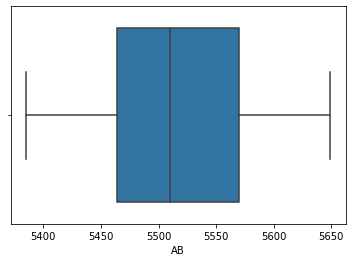

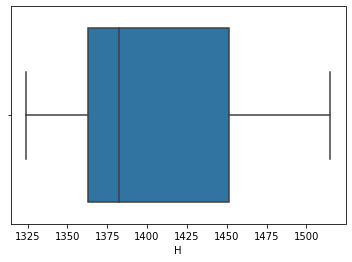

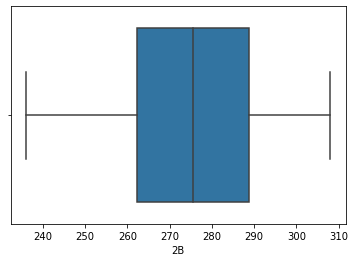

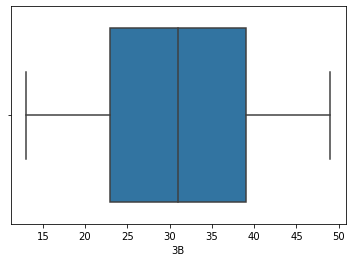

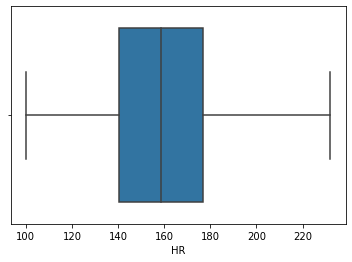

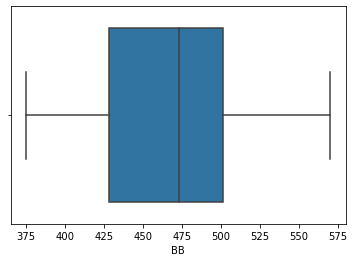

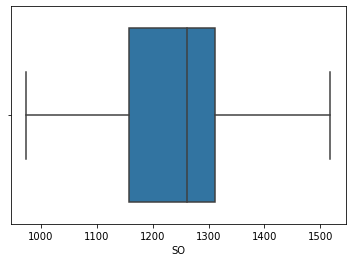

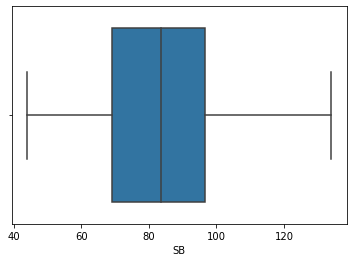

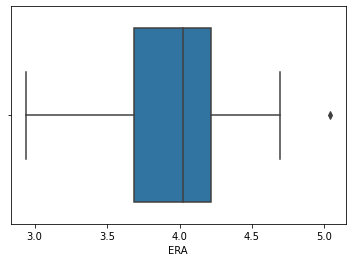

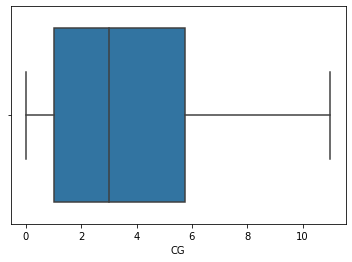

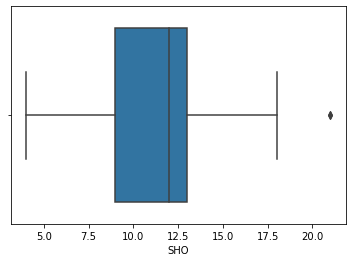

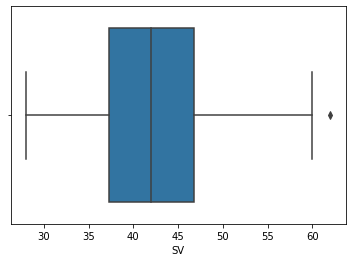

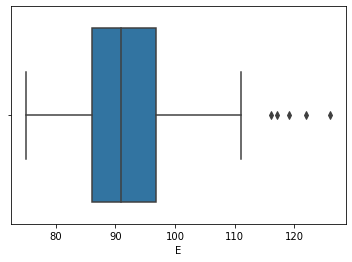

In [105]:
for i in v.columns:
    sns.boxplot(v[i])
    plt.show()

In [106]:
v.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'ERA', 'CG', 'SHO',
       'SV', 'E'],
      dtype='object')

In [107]:
#Outliers are in upper range of features R , ERA , SHO , SV , E , lets handle them

In [108]:
IQR= df['R'].quantile(.75)-df['R'].quantile(.25)
IQR
upper= df['R'].quantile(.75) +( 1.5 * IQR)
upper

818.75

In [109]:
v['R']= np.where(v['R']>upper,upper,v['R'])

In [110]:
IQR= df['ERA'].quantile(.75)-df['ERA'].quantile(.25)
IQR
upper= df['ERA'].quantile(.75) +( 1.5 * IQR)
upper
v['ERA']= np.where(v['ERA']>upper,upper,v['ERA'])

In [111]:
IQR= df['SHO'].quantile(.75)-df['SHO'].quantile(.25)
IQR
upper= df['SHO'].quantile(.75) +( 1.5 * IQR)
upper
v['SHO']= np.where(v['SHO']>upper,upper,v['SHO'])

In [112]:
IQR= df['SV'].quantile(.75)-df['SV'].quantile(.25)
IQR
upper= df['SV'].quantile(.75) +( 1.5 * IQR)
upper
v['SV']= np.where(v['SV']>upper,upper,v['SV'])

In [113]:
IQR= df['E'].quantile(.75)-df['E'].quantile(.25)
IQR
upper= df['E'].quantile(.75) +( 1.5 * IQR)
upper
v['E']= np.where(v['E']>upper,upper,v['E'])

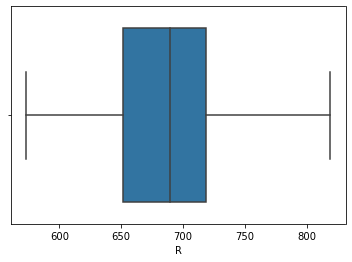

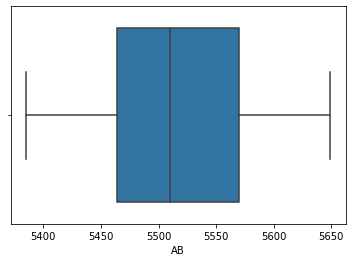

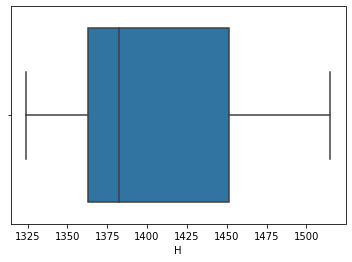

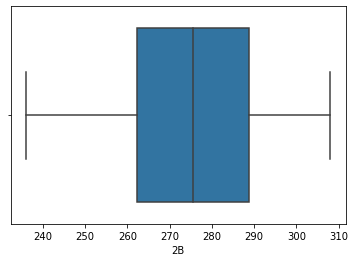

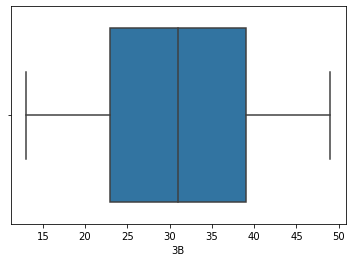

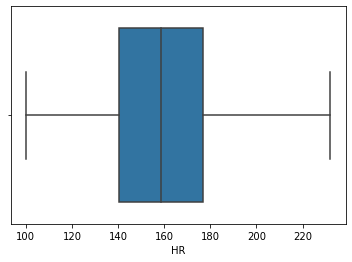

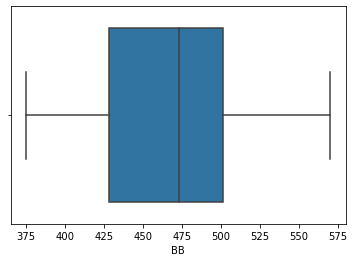

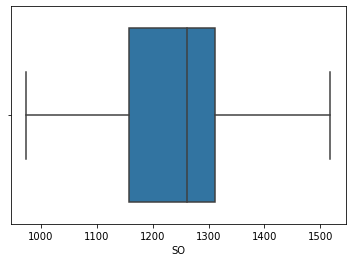

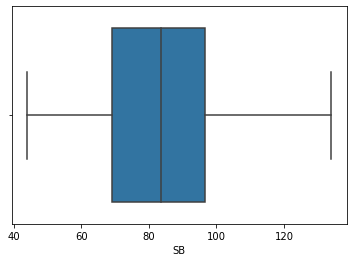

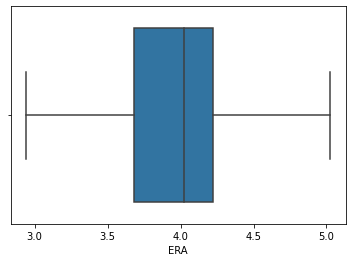

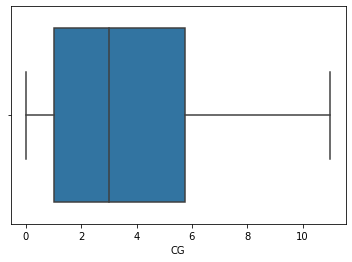

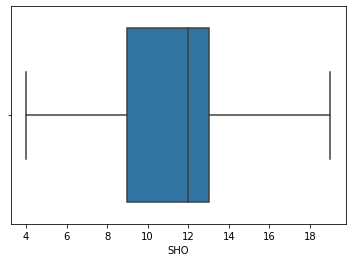

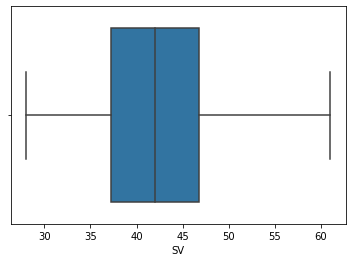

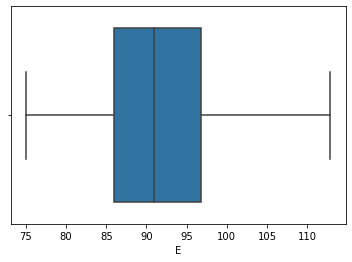

In [114]:
for i in v.columns:
    sns.boxplot(v[i])
    plt.show()

In [115]:
# outliers handled

v.skew()

R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.037969
CG     0.736845
SHO    0.218030
SV     0.612333
E      0.504019
dtype: float64

In [116]:
# Skewmess is also removed

Transformation

In [117]:

transformed=power_transform(v)

In [118]:
transformed=pd.DataFrame(transformed)
transformed.columns=v.columns

In [119]:
transformed.skew()


R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
ERA    0.001204
CG    -0.059785
SHO   -0.017889
SV     0.001270
E      0.032939
dtype: float64

In [120]:
transformed.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.0,0.0,0.0,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.502797,-0.359844,-0.827928,1.564693,-0.357505
1,0.0,0.0,0.0,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.261440,-0.359844,0.258244,0.361185,-0.560947
2,0.0,0.0,0.0,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.638366,1.993513,-0.272431,-0.611107,-1.355876
3,0.0,0.0,0.0,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.059785,1.220103,-0.546703,-0.767843,0.764697
4,0.0,0.0,0.0,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.528523,1.220103,0.258244,-1.097417,-0.560947


Standardization

In [121]:
sc=StandardScaler()
scaled=sc.fit_transform(transformed)

# EDA Concluding Remarks

Within features some are very low correlated with target variable and some are highly negative correlated.

Also, multicolinearity is also available, some independent feature are highly correlated to each other

# Building Machine Learning Models

In [122]:
X= scaled

In [123]:
Y=df['W']

In [124]:
X.shape

(30, 14)

In [125]:
Y.shape

(30,)

In [126]:
LR= LinearRegression()

In [138]:
# Train Test Split / finding best random_state for my model

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.2)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X'*50,'\n')

At random state  30 The model performance very well
At random state:  30
Test R2 score is:  0.84
Train R2 score is:  0.84
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  47 The model performance very well
At random state:  47
Test R2 score is:  0.85
Train R2 score is:  0.85
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  99 The model performance very well
At random state:  99
Test R2 score is:  0.85
Train R2 score is:  0.85
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  175 The model performance very well
At random state:  175
Test R2 score is:  0.86
Train R2 score is:  0.86
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



In [139]:
# Select Random state= 175

x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=175,test_size=.2)
LR.fit(x_train,y_train)

LinearRegression()

In [140]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [141]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 2.7264065961746673
mean_square_error of LinearRegression() model 13.319637960999806
R2 Score of LinearRegression() model 86.25266724208736
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 2.294706185531917
mean_square_error of Ridge() model 11.152294329870855
R2 Score of Ridge() model 88.48960447605072
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 2.851798496410254
mean_square_error of Lasso() model 9.180635618736224
R2 Score of Lasso() model 90.524573329286
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 9.166666666666666
mean_square_error of DecisionTreeRegressor() model 118.5
R2 Score of DecisionTreeRegressor() model -22.305045871559614
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 8.005345608904014
mean_square_error of SVR() model 91.1232721063

CROSS Validation

In [131]:
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean())
    print('*'*50)

mean_square of  LinearRegression() model 13.319637960999806
cross Validation score of  LinearRegression()  is  -55.10832658669841
**************************************************
mean_square of  Ridge() model 11.152294329870855
cross Validation score of  Ridge()  is  -47.703110230419824
**************************************************
mean_square of  Lasso() model 9.180635618736224
cross Validation score of  Lasso()  is  -38.001201439016555
**************************************************
mean_square of  DecisionTreeRegressor() model 94.16666666666667
cross Validation score of  DecisionTreeRegressor()  is  -116.26666666666668
**************************************************
mean_square of  SVR() model 91.1232721063577
cross Validation score of  SVR()  is  -101.43654219683
**************************************************
mean_square of  KNeighborsRegressor() model 55.53999999999997
cross Validation score of  KNeighborsRegressor()  is  -80.90266666666668
***********************

In [132]:
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('*'*50)

Root mean_square of  LinearRegression() model 3.649607918804403
cross Validation score of root mean square  LinearRegression()  is  7.4234982714821465
**************************************************
Root mean_square of  Ridge() model 3.3395051025370295
cross Validation score of root mean square  Ridge()  is  6.906743822556315
**************************************************
Root mean_square of  Lasso() model 3.029956372414663
cross Validation score of root mean square  Lasso()  is  6.164511451771061
**************************************************
Root mean_square of  DecisionTreeRegressor() model 9.703951085339758
cross Validation score of root mean square  DecisionTreeRegressor()  is  10.771876964268268
**************************************************
Root mean_square of  SVR() model 9.545851041492199
cross Validation score of root mean square  SVR()  is  10.071570989514496
**************************************************
Root mean_square of  KNeighborsRegressor() model 7.

Hypertuning of XGBRegressor

In [133]:
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.01, 0.05,0.1, 0.2 , 0.3],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [134]:
GCV= GridSearchCV(XGB_model,params,cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
     

In [135]:
GCV.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.01,
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 3}

In [136]:
GCV_pred=GCV.best_estimator_.predict(x_test)
mean_squared_error(y_test,GCV_pred)

76.23911029390486

# Concluding Remarks

We have used XGBRegressor because its perfoemance is good among all as seen above. We have reduced the margin of error in this regressor from 81 to 76 as shown above.